In [1]:
import desitarget 
from desitarget.targets import desi_mask, bgs_mask, mws_mask

from astropy.table import Table
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
! ls /global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS*.dat.fits

/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_N_clustering.dat.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_S_clustering.dat.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits


In [3]:
N = Table.read('/global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/test/BGS_BRIGHT_N_clustering.dat.fits')
S = Table.read('/global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/test/BGS_BRIGHT_S_clustering.dat.fits')

In [4]:
data = Table(np.hstack((N, S)))
data

TARGETID,Z,NTILE,TILES,RA,DEC,WEIGHT,WEIGHT_ZFAIL,WEIGHT_COMP,WEIGHT_SYS,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,NZ,WEIGHT_FKP,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_RP1,ABSMAG_RP0
int64,float64,int64,bytes11,float64,float64,float64,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
39633366047264297,0.16095951646742163,1,20001,268.7008850398322,58.31651750837625,2.368794267525197,1.0202607,2.0,1.1608769635685512,7.7169294,16.809292,28.698618,21.945616,12.552565,0.01856145426373512,0.016762400045732102,0.721548822097457,-0.0480892836645471,0.07562442170381622,0.17676402087349832,0.38471493423821956,0.637311614101099,-0.15613073097339897,-0.15613073097339897,-19.01505339080518,-19.239906695343226
39633366047264412,0.2262081883049673,1,20001,268.7121644210125,58.17137871856034,7.885935437241774,1.0119702,7.0,1.1132365826456456,5.6451545,17.743734,36.715954,42.338474,30.138641,0.008661962234134126,0.03524444880947024,0.8916872718248806,0.055141909042679765,0.4068761917832286,0.28235492619244257,0.7782674152354703,0.7475090655224019,-0.21942194265581827,-0.21942194265581827,-19.934640009395764,-20.16185302654553
39633366047264710,0.20509598282456507,1,20001,268.7447179685751,58.35164090788789,3.5493453409436366,1.0191563,3.0,1.1608769635685512,9.199382,18.115196,31.323214,38.144897,31.80481,0.011911149469520776,0.025879084952906813,0.5397214238839109,-0.06256931584764004,0.13341940431141774,0.14342391928728798,0.37673369579311694,0.5024003675371398,-0.19894310333982812,-0.19894310333982812,-19.621429255164735,-19.82742249029966
39633378638561503,0.3053206447975358,1,20001,270.5073482253405,59.33896919077583,2.3158908743540527,1.0118785,2.0,1.1443522597899662,5.816003,24.00663,49.666294,60.648766,39.263374,0.0032132398416806277,0.08965087986982612,0.948196974030458,0.1920467162085221,0.783116328481775,0.4201382412002311,1.1720507422145277,0.7873540852894143,-0.2961610254536097,-0.2961610254536097,-21.06440409622748,-21.29249562121919
39633372376467396,0.2775320962351793,1,20001,268.5121713053863,58.81550252397294,3.2715555825991145,1.0216688,3.0,1.067389487000734,4.9087415,18.647816,47.224636,121.78173,128.69661,0.006279602345083299,0.047974048180681544,0.9314978452803849,0.14147467853484277,0.6591231040064112,0.36796505192895507,1.0449898286507322,0.7721214940301759,-0.26920613334812393,-0.26920613334812393,-20.528724008118733,-20.755214381512847
39633366047264487,0.10750217420934505,1,20001,268.72025843577376,58.150995263304566,3.3792646040688217,1.0118438,3.0,1.1132365826456456,65.581665,164.53503,310.0892,251.75818,156.65999,0.026715267796619462,0.011706208574030397,0.9793147837596916,-0.09317160654032018,-0.07379673881075391,0.1383131834916128,0.320207896877415,0.8167949381034556,-0.10427710898306469,-0.10427710898306469,-20.549183985528458,-20.78066877556039
39633366047264069,0.23373774756268273,1,20001,268.6773406567538,58.196956322063585,5.65722136226266,1.0163556,5.0,1.1132365826456456,5.1988206,18.016794,36.307766,35.975773,23.484913,0.008661962234134126,0.03524444880947024,0.9539436956606155,0.08093321342091594,0.4764215093374489,0.30965139400867076,0.8662922728465651,0.7927911127392542,-0.22672561513580225,-0.22672561513580225,-20.049808198242104,-20.27852637882986
39633366051455429,0.2274295421540546,1,20001,268.86868202000977,58.30892044280674,2.274872090138421,1.0217379,2.0,1.1132365826456456,24.459436,80.40709,158.21242,162.85123,116.77073,0.008661962234134126,0.03524444880947024,0.922871669122532,0.06516651677486968,0.43441482751073607,0.2918134730009922,0.8171449928840472,0.7667884599753434,-0.22060665588943296,-0.22060665588943296,-21.597261119229156,-21.82390807545528
39633366051455137,0.10835235408674397,1,20001,268.8319239967375,58.17904527599571,1.1271243570102703,1.0124751,1.0,1.1132365826456456,23.193655,33.353035,

In [5]:
data.dtype.names

('TARGETID',
 'Z',
 'NTILE',
 'TILES',
 'RA',
 'DEC',
 'WEIGHT',
 'WEIGHT_ZFAIL',
 'WEIGHT_COMP',
 'WEIGHT_SYS',
 'flux_g_dered',
 'flux_r_dered',
 'flux_z_dered',
 'flux_w1_dered',
 'flux_w2_dered',
 'NZ',
 'WEIGHT_FKP',
 'REST_GMR_0P1',
 'KCORR_R0P1',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_G0P0',
 'REST_GMR_0P0',
 'EQ_ALL_0P0',
 'EQ_ALL_0P1',
 'ABSMAG_RP1',
 'ABSMAG_RP0')

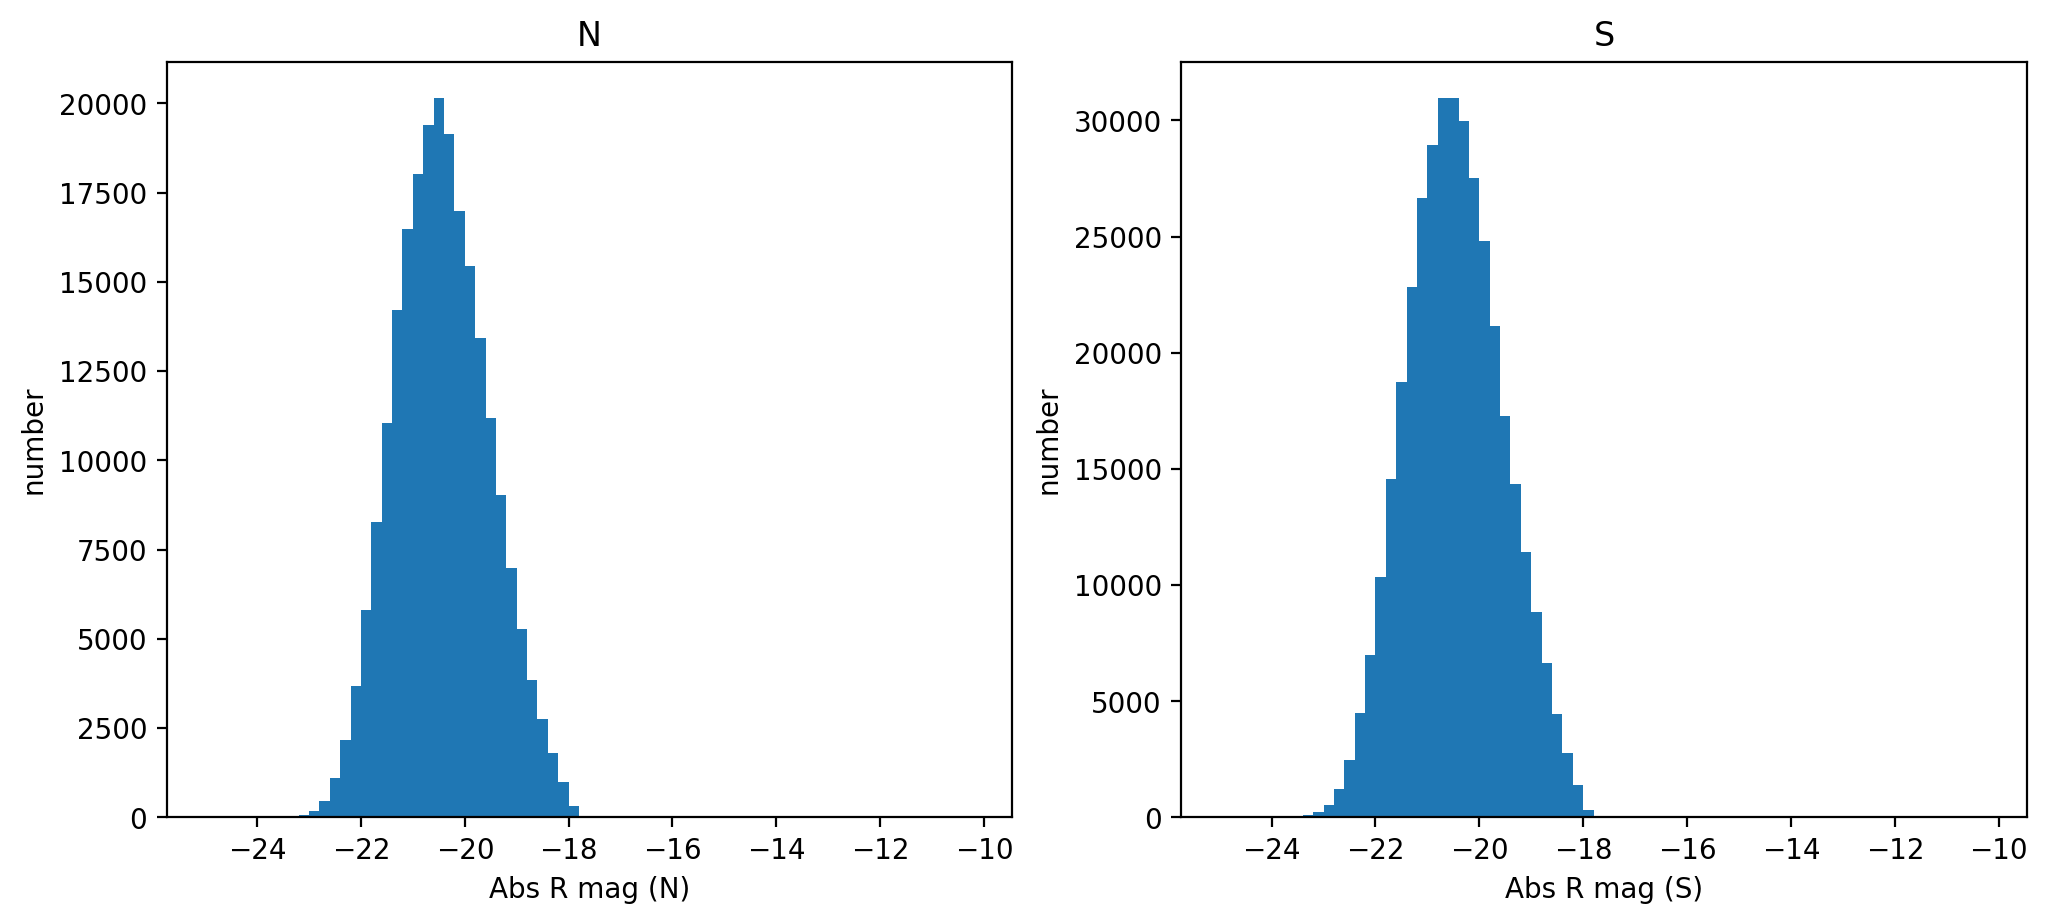

In [6]:
plt.figure(figsize=(12,5),dpi=200)
M_range = np.arange(-25,-10,0.2)
plt.subplot(121)
plt.title('N')
plt.hist(N['ABSMAG_RP1'], bins=M_range)
plt.xlabel('Abs R mag (N)')
plt.ylabel('number')

plt.subplot(122)
plt.title('S')
plt.hist(S['ABSMAG_RP1'], bins=M_range)
plt.xlabel('Abs R mag (S)')
plt.ylabel('number')

plt.savefig('../figures/week8-9/da02_abs_rmag_hist')

N maglim: 19.539993 ; S maglim: 19.5

In [8]:
data['z_mag'] = 22.5 - 2.5*np.log10(data['flux_z_dered'])
data['w1_mag'] = 22.5 - 2.5*np.log10(data['flux_w1_dered'])
data['g_mag'] = 22.5 - 2.5*np.log10(data['flux_g_dered'])
data['r_mag'] = 22.5 - 2.5*np.log10(data['flux_r_dered'])

N['z_mag'] = 22.5 - 2.5*np.log10(N['flux_z_dered'])
N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
N['g_mag'] = 22.5 - 2.5*np.log10(N['flux_g_dered'])
N['r_mag'] = 22.5 - 2.5*np.log10(N['flux_r_dered'])

S['z_mag'] = 22.5 - 2.5*np.log10(S['flux_z_dered'])
S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
S['g_mag'] = 22.5 - 2.5*np.log10(S['flux_g_dered'])
S['r_mag'] = 22.5 - 2.5*np.log10(S['flux_r_dered'])

/tmp/ipykernel_38207/3933311458.py:2: RuntimeWarning: invalid value encountered in log10
  data['w1_mag'] = 22.5 - 2.5*np.log10(data['flux_w1_dered'])
/tmp/ipykernel_38207/3933311458.py:7: RuntimeWarning: invalid value encountered in log10
  N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
/tmp/ipykernel_38207/3933311458.py:12: RuntimeWarning: invalid value encountered in log10
  S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])


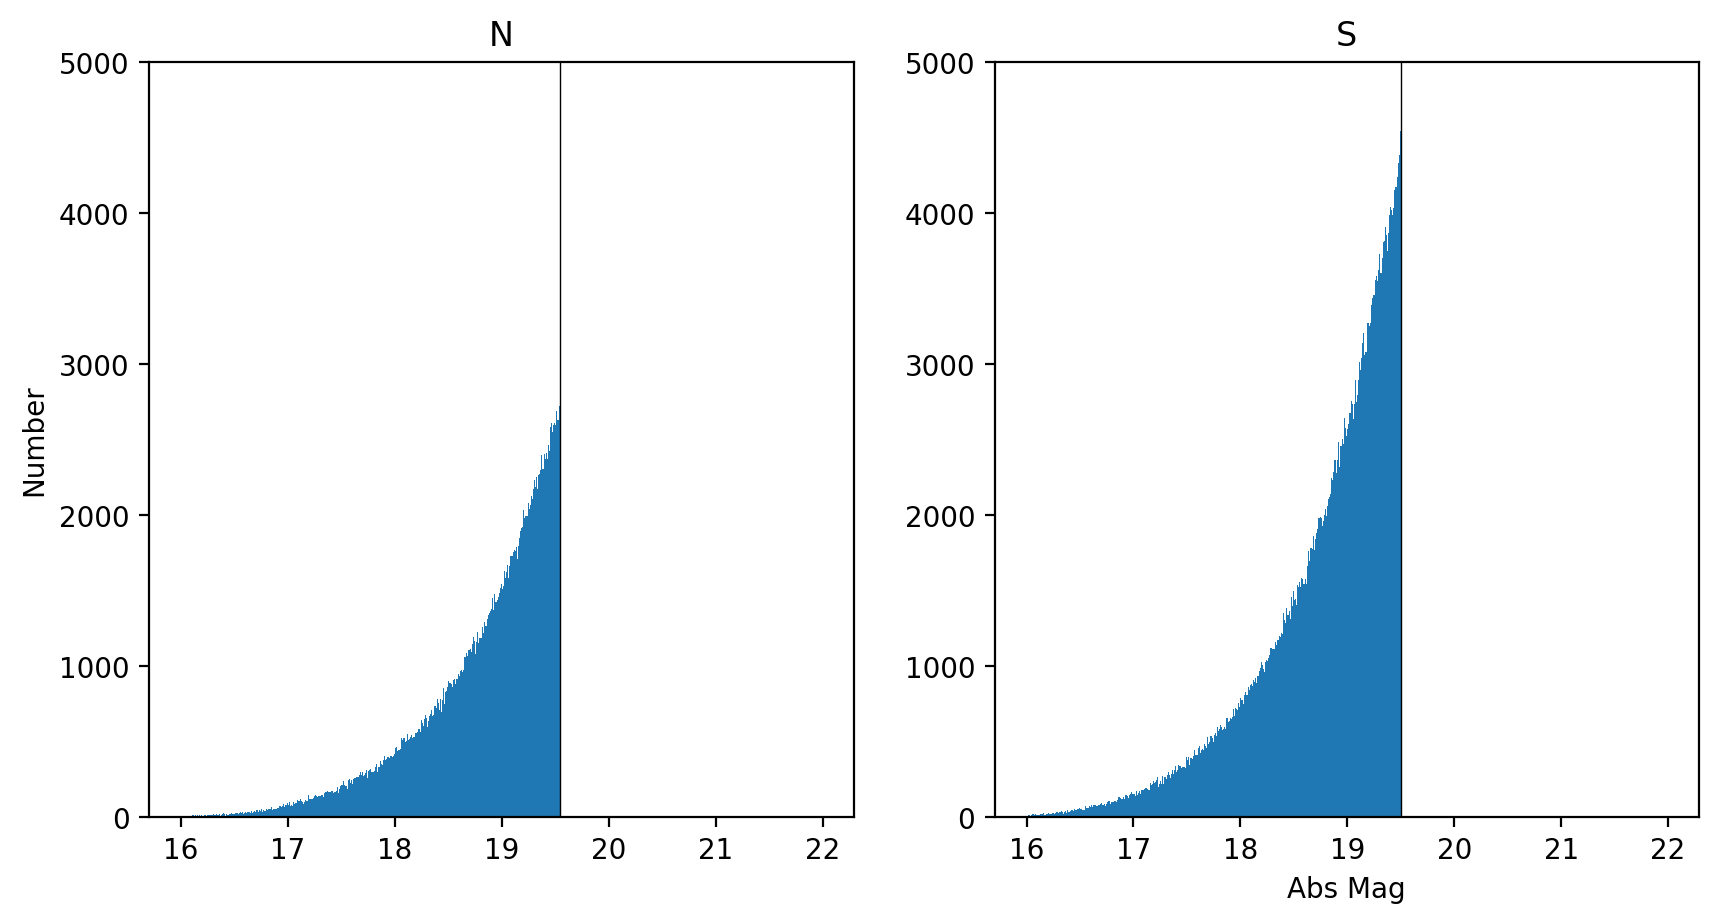

In [9]:
plt.figure(figsize=(10,5), dpi=200)

plt.subplot(121)
plt.title('N')
plt.hist(N['r_mag'], bins=np.arange(16,22,0.01))
plt.plot([19.539993,19.539993],[0,5000], lw=0.5, color='k')
plt.ylim(0,5000)
plt.ylabel('Number')

plt.subplot(122)
plt.title('S')
plt.hist(S['r_mag'], bins=np.arange(16,22,0.01))
plt.plot([19.5,19.5],[0,5000], lw=0.5, color='k')
plt.ylim(0,5000)
plt.xlabel('Abs Mag')


plt.show()

Rest frame g-r colour

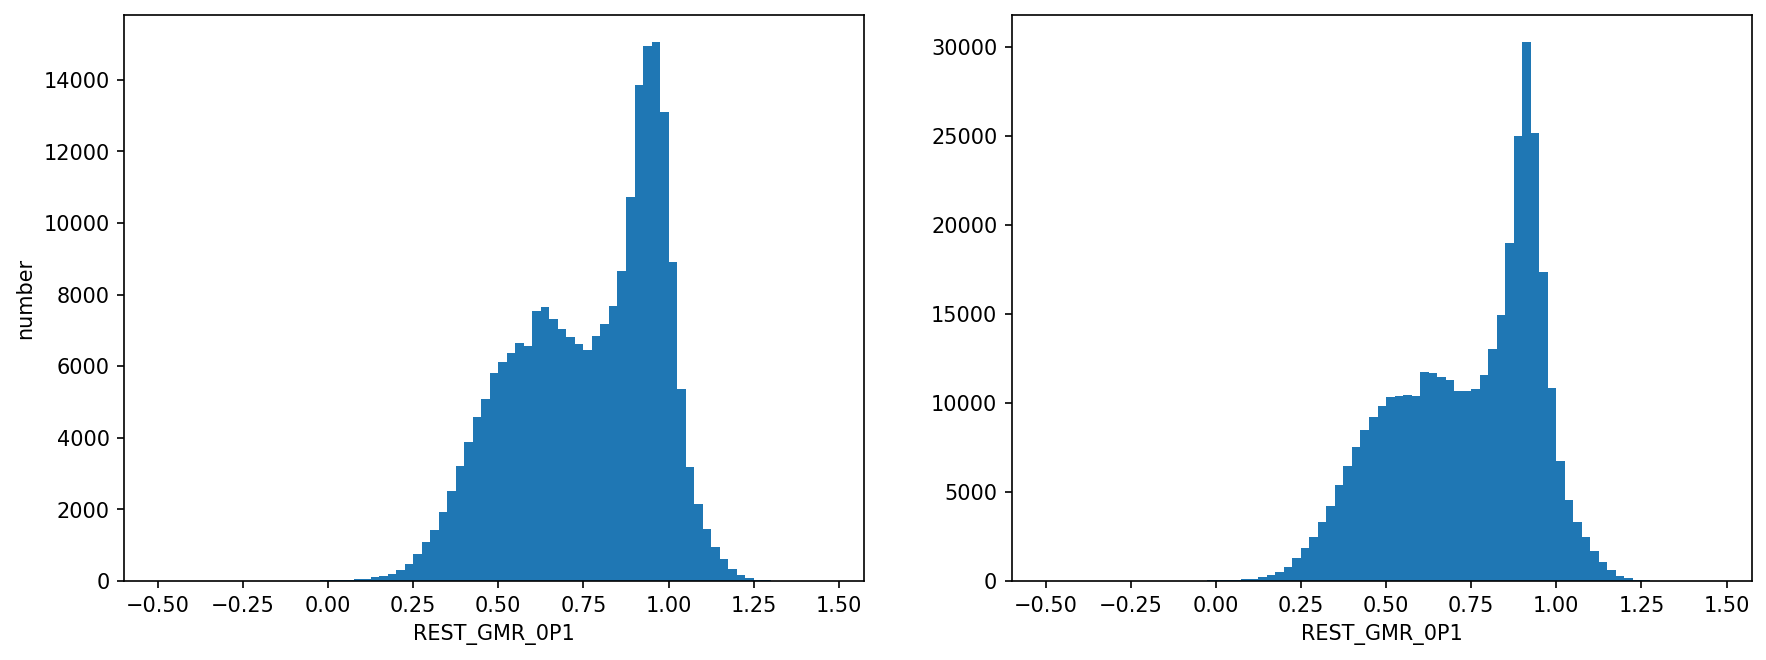

In [10]:
plt.figure(figsize=(14,5),dpi=150)
plt.subplot(121)
plt.hist(N['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025))
plt.xlabel('REST_GMR_0P1')
plt.ylabel('number')
plt.subplot(122)
plt.hist(S['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025))
plt.xlabel('REST_GMR_0P1')
plt.savefig('../figures/week8-9/main_restcolour_hist.png')

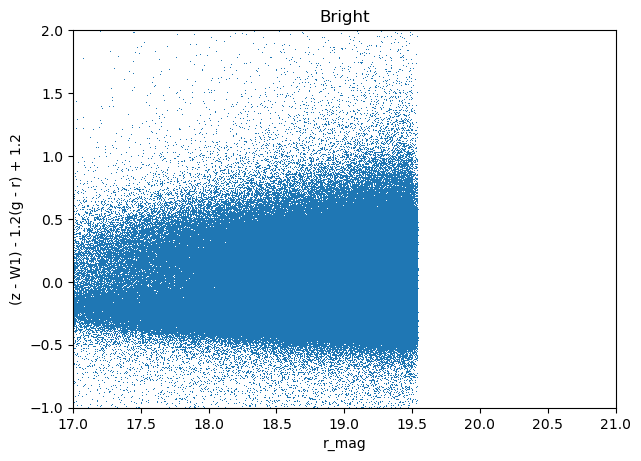

In [11]:
Y = (data['z_mag'] - data['w1_mag']) - 1.2*(data['g_mag'] - data['r_mag']) + 1.2
plt.figure(figsize=(7,5), dpi=100)
plt.title('Bright')
plt.plot(data['r_mag'], Y, lw=0, marker=',', color='tab:blue')
plt.plot(data['r_mag'], Y, lw=0, marker=',', color='tab:blue')
plt.ylim((-1,2))
plt.xlim((17,21))
plt.ylabel('(z - W1) - 1.2(g - r) + 1.2')
plt.xlabel('r_mag')
plt.savefig('../figures/week8-9/da02_Fig4.png')

#no faint